In [213]:
#빅데이터_분석&시각화 #미니실습,

# 머신러닝에서, 회귀 분석,
#
# 프로세스
# 보스톤 집값, 자동차 연비,
#
# 1) 데이터 수집 및 전처리 , 제공된 데이터 이용.
# 2) 데이터, 학습용 , 평가용 분리 7:3
# 3) 회귀 모델 불러오기.
# 4) 회귀 모델 학습, fit
# 5) 학습된 모델을 이용해서, 예측값 구하기.
# 6) 모델을 이용해서 구한 예측값 vs 실제값 , MSE(평균제곱오차), R^2,
# 7) 각 x , 독립변수 가 , 종속변수(결괏값) 영향을 미치는 부분 그래프 표현하기.
#
# ==========================================================
# 1) 타이타닉 생존자 수
#
# -> 머신러닝으로, 회귀분석 해보세요.
# 프로세스
# 1) ~ 7)
#
# 아래의 변수로 추출해서, 작업하기.
# 독립변수 : pclass, sex, age, sibsp, parch, age2, family
# 종속변수 : survived

In [214]:
import numpy as np
import pandas as pd
# header = 0 -> csv 의 컬럼 -> df 의 컬럼으로 사용.
data_df = pd.read_csv("./titanic_new_family.csv", header = 0 , engine="python")
print(f"data_df 의 크기 : {data_df.shape}")
data_df.head()

data_df 의 크기 : (891, 17)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age2,family
0,0,3,1,22.0,1,0,7.2500,S,Third,man,True,C,Southampton,no,False,2,2
1,1,1,0,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,3,2
2,1,3,0,26.0,0,0,7.9250,S,Third,woman,False,C,Southampton,yes,True,2,1
3,1,1,0,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,3,2
4,0,3,1,35.0,0,0,8.0500,S,Third,man,True,C,Southampton,no,True,3,1


In [215]:
# # 데이터 불러오기
# data_df = pd.read_csv("./titanic_new_family.csv", header=0, engine="python")
# print(f"data_df 의 크기 : {data_df.shape}")
# print(data_df.head())
#
# # 결측치 처리 (결측치가 있는 행 삭제)
# data_df = data_df.dropna()

In [216]:
data_df = data_df.drop(["fare", "embarked", "class", "who", "adult_male", "deck", "embark_town", "alive", "alone" ], axis=1, inplace=False)
data_df.head()

,survived,pclass,sex,age,sibsp,parch,age2,family
0,0,3,1,22.0,1,0,2,2
1,1,1,0,38.0,1,0,3,2
2,1,3,0,26.0,0,0,2,1
3,1,1,0,35.0,1,0,3,2
4,0,3,1,35.0,0,0,3,1


In [217]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    int64  
 3   age       891 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
 6   age2      891 non-null    int64  
 7   family    891 non-null    int64  
dtypes: float64(1), int64(7)
memory usage: 55.8 KB


In [218]:
# 독립변수(X)와 종속변수(y) 정의
X = data_df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'age2', 'family']]
y = data_df['survived']

# 범주형 데이터 처리 (성별 컬럼을 숫자형으로 변환)
X = pd.get_dummies(X, columns=['sex'], drop_first=True)

In [219]:
from sklearn.model_selection import train_test_split

# 학습용 데이터와 테스트용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"학습 데이터 크기: {X_train.shape}, 테스트 데이터 크기: {X_test.shape}")

학습 데이터 크기: (623, 7), 테스트 데이터 크기: (268, 7)


In [220]:
from sklearn.linear_model import LinearRegression

# 선형 회귀 모델 불러오기
lr = LinearRegression()

# 모델 학습
lr.fit(X_train, y_train)

LinearRegression()

In [221]:
# 학습된 모델을 이용해서 예측값 구하기
y_pred = lr.predict(X_test)

In [222]:
from sklearn.metrics import mean_squared_error, r2_score

# MSE (평균제곱오차) 계산
mse = mean_squared_error(y_test, y_pred)

# 결정계수 R^2 계산
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.4f}")
print(f"R^2: {r2:.4f}")

MSE: 0.1349
R^2: 0.4442


In [223]:
# 회귀 계수 및 y절편 확인
print(f"Y 절편의 값 : {lr.intercept_}")
print(f"회귀 계수의 값 : {np.round(lr.coef_, 1)}")

Y 절편의 값 : 1.335605438834396
회귀 계수의 값 : [-0.2 -0.  -0.  -0.   0.1 -0.  -0.5]


In [224]:
# 회귀 계수 정리 (변수명과 계수 매핑)
coef = pd.Series(data=np.round(lr.coef_, 2), index=X.columns)

# 계수값을 큰 순서대로 정렬
print("회귀 계수 정렬:")
print(coef.sort_values(ascending=False))

회귀 계수 정렬:
age2      0.07
parch    -0.00
age      -0.01
sibsp    -0.02
family   -0.02
pclass   -0.17
sex_1    -0.51
dtype: float64


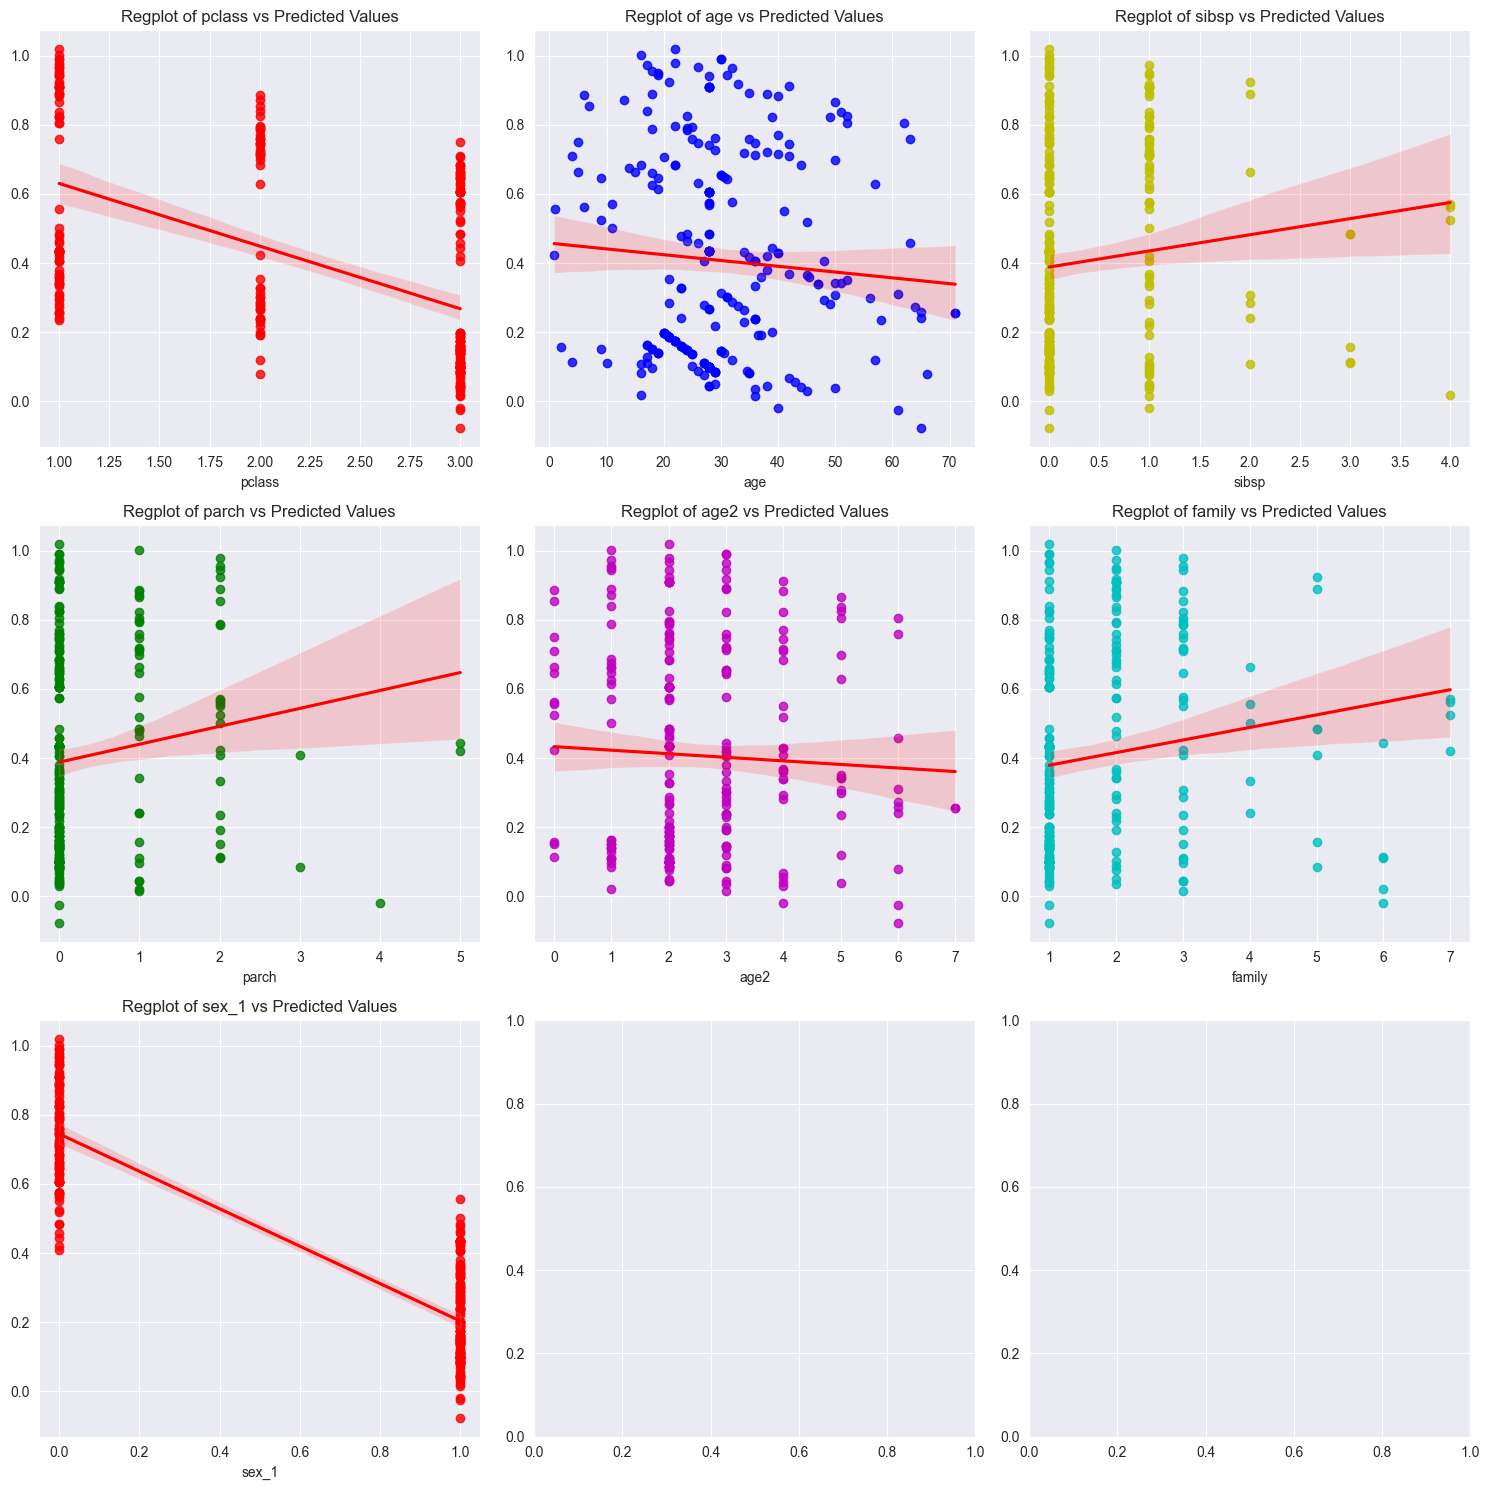

In [225]:
import seaborn as sns
import matplotlib.pyplot as plt

# 시각화할 그래프 설정
num_features = len(X.columns)
cols = 3  # 각 행에 3개의 그래프
rows = (num_features + cols - 1) // cols  # 필요한 행 수 계산

# 색상 옵션 설정 (X.columns의 개수에 맞춰 색상 배열 크기 조정)
plot_color = ["r", "b", "y", "g", "m", "c", "r"] * (num_features // 5 + 1)  # 색상 반복해서 길이 맞추기

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))  # 동적으로 행 크기 설정

# 각 독립 변수와 예측값 간의 관계 시각화 (regplot)
for i, feature in enumerate(X.columns):
    row = i // cols
    col = i % cols
    sns.regplot(x=X_test[feature], y=y_pred, ax=axes[row, col], line_kws={"color": "red"}, scatter_kws={"color": plot_color[i]})
    axes[row, col].set_title(f'Regplot of {feature} vs Predicted Values')

# 레이아웃 조정
plt.tight_layout()
plt.show()